This document refines the top 200 song table, in order to analyze what songs were played the most for a particular month. First, we import all necessary libraries. 

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import operator
from collections import defaultdict

In the top 200 csv, the data is ordered in columns that denote a particular day, so in the code below we loop through all the collumns in a certain month and record the artist name of each song each day in the top 200. In this case we are looking through the month of april.

In [13]:
df = pd.read_csv('./top_200_table.csv', sep='\t')
all_columns = df.columns
new_table = []
i = "01"

for column in all_columns:
    if column == ('2018-04-%s' %i):
        if((int(i) + 1) < 10):
            i = ("0" + str(int(i) + 1))
            for row in df[column]:
                new_table.append(row.split(','))
        else:
            i = str(int(i) + 1)
            for row in df[column]:
                new_table.append(row.split(','))

#get all artists in top 200 for the month of april this year
number1_april_2018 = []
m = 0
for song in new_table:
    for parameter in song:
        number1_april_2018.append(new_table[m][2])
    m = m + 1

    

Now that we have a big list of a bunch of artist names, we can count up these names and record the frequency in which they appear, and in the above code snippet I sort them by frequency in decending order and take only the top 20 artists to make them easier to see in a bar graph.

In [17]:
#counts up the number of times an artist apears in the previous list
total_check = 0
ranked_2018_april = defaultdict(int)

for artist in number1_april_2018:
    ranked_2018_april[artist] += 1
    total_check += 1

for artist in ranked_2018_april:
    ranked_2018_april[artist] = ranked_2018_april[artist] / 5

#sorting the results so they will display largest number of appearences first
sorted_artists = sorted(ranked_2018_april.items(), key=operator.itemgetter(1), reverse=True)
top_20_ranked_april = (sorted_artists[:20])#looking at only top 20 so the graph looks nice
print(top_20_ranked_april)
print(total_check/5)

[('"Cardi B"', 241.6), ('XXXTENTACION', 208.0), ('"The Weeknd"', 168.8), ('"Post Malone"', 164.0), ('Migos', 107.2), ('"J. Cole"', 104.8), ('"Kendrick Lamar"', 98.4), ('Drake', 94.4), ('Khalid', 92.0), ('Logic', 83.2), ('"Lil Skies"', 70.4), ('"Rich The Kid"', 68.0), ('6ix9ine', 67.2), ('"Imagine Dragons"', 60.0), ('"Lil Uzi Vert"', 58.4), ('G-Eazy', 55.2), ('Bazzi', 46.4), ('"Camila Cabello"', 44.0), ('Marshmello', 43.2), ('"Famous Dex"', 43.2)]
4320.0


In [ ]:
#counts up the number of times an artist apears in the previous list
total_check = 0
ranked_2018_april = defaultdict(int)

for artist in number1_april_2018:
    ranked_2018_april[artist] += 1
    total_check += 1

for artist in ranked_2018_april:
    ranked_2018_april[artist] = ranked_2018_april[artist] / 5

#sorting the results so they will display largest number of appearences first
sorted_artists = sorted(ranked_2018_april.items(), key=operator.itemgetter(1), reverse=True)
top_20_ranked_april = (sorted_artists[:20])#looking at only top 20 so the graph looks nice
 
    
data = {"Artist": [], "Count": []}
for i in top_20_ranked_april:
    data["Artist"].append(i[0])
    data["Count"].append(i[1])

Below we convert the dictionary created above to a dataframe and update the indices. 

([<matplotlib.axis.XTick at 0x1083e7be0>,
 <a list of 20 Text xticklabel objects>)

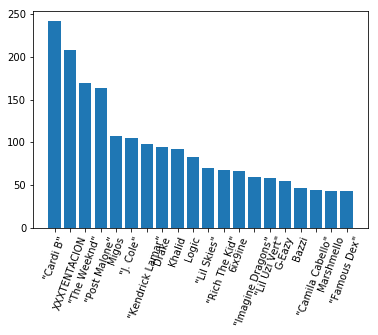

In [66]:
df = pd.DataFrame(data)
df.index = df["Artist"]
del df["Artist"]
df.to_csv("song_count.csv")
plt.bar(range(len(df.Count)),df.Count,align="center")
plt.xticks(range(len(df.Count)),df.index,rotation=70)

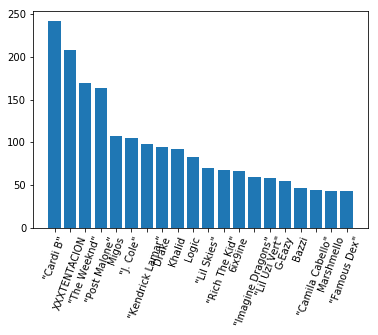

In [61]:
plt.bar(range(len(top_20_ranked_april)), [val[1] for val in top_20_ranked_april], align='center')
plt.xticks(range(len(top_20_ranked_april)), [val[0] for val in top_20_ranked_april])
plt.xticks(rotation=70)
plt.show()